<a href="https://colab.research.google.com/github/GiuniorCandido/MAC0110/blob/master/Alinhamento_sequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivos

Continuar a prática de manipulação de strings: criar, varrer, comparar, fatiar, concatenar etc.
Funções com strings.
usar funções de módulos que você mesmo desenvolveu, usando import.
Introdução

Em bioinformática, um alinhamento de sequência é uma maneira de organizar as seqüências de DNA, RNA ou proteína para identificar seu grau de similaridade que pode ser importante na identificação de relações funcionais, estruturais ou evolutivas entre eles. Curiosamente, o genoma humano e do rato compartilham uma região conservada com até 8 megabases de comprimento.

Um alinhamento global é realizado do início ao fim das sequências. Ele é ótimo se tem a maior pontuação possível.

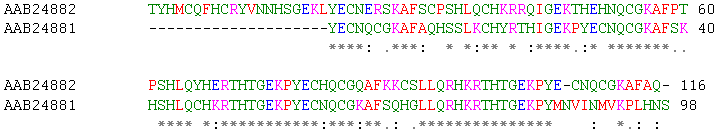

Figura: Alinhamento entre duas sequências, produzido pelo programa ClustalW entre duas proteínas dedo-de-zinco humanas (human zinc finger proteins) identificadas por seus números de acesso no GenBank.
Fonte: Wikipédia: Alinhamento de sequências


Nesse exercício daremos continuidade ao EP12 encontrando alinhamentos de maior pontuação entre variações de duas sequências de DNA. Para usar as funções pontuacao() e gera_gaps() do arquivo ep12.py, o arquivo ep13.py carrega as funções definidas no ep12.py usando o comando import ep12 (veja que sem a extensão .py).

Assim como quando usamos funções do módulo random, você deve chamar as funções do módulo ep12 usando um ponto, ou seja,
coloque em seu código no EP13 as chamadas ep12.pontuacao() e ep12.gera_gaps() sempre que precisar usar essas funções do EP12.

In [0]:
# módulo ep12: ep12.gera_gaps(), ep12.pontuacao()
import ep12

# Constantes
# use essas constantes caso desejar
DNA = 'CA'
GAP = '_'

#------------------------------------------------------------------
def main():
    '''
        Modifique essa função, escrevendo os seus testes.
    '''
    ''' 
    ## exemplos de chamada da função do módulo ep12
    print('Testes das funções do módulo ep12:')
    print(ep12.gera_gaps('T'))
    print(ep12.gera_gaps( 'CA' ))
    print(ep12.gera_gaps( 'AT_G' ))

    print(ep12.pontuacao(5, 5, 3, 'T_CGTAC', 'ATCG___'))
    print(ep12.pontuacao(1, 5, 3, 'T_CGTAC', 'ATCG___'))
    print(ep12.pontuacao(5, 5, 3,  'T_CGTA',  'ATCG__'))
    print()
    ''' 
    ## Escreva aqui os testes para a função gera_n_gaps()
    #
    print(gera_n_gaps(DNA, 2))
    print()
    print(pontuacao_max(5, 1, 0, 'AT_', 'A_T', 2))
    ## Escreva aqui os testes para a função pontuacao_max()
    #
 
    print("Fim dos meus testes.")

#------------------------------------------------------------------
#
def gera_n_gaps( dna, n = 1 ):
    '''( str, int ) -> list

    RECEBE uma string `dna` representando uma fita de DNA com os
    símbolos 'A', 'T', 'C', 'G' e '_' (gap), e um número inteiro positivo `n`.
 
    RETORNA uma lista sem repetições com todas as variações de `dna` 
    com até `n` gaps extras.


    EXEMPLOS:
 
    In [1]: gera_n_gaps( 'T', 2 )
    Out[1]: ['T', '_T', 'T_', '__T', '_T_', 'T__']
    
    In [2]: gera_n_gaps( 'CA', 2 )
    Out[2]: ['CA', '_CA', 'C_A', 'CA_', '__CA', '_C_A', '_CA_', 'C__A', 'C_A_', 'CA__']
    
    In [3]: gera_n_gaps( 'C_A', 2)
    Out[3]: ['C_A', '_C_A', 'C__A', 'C_A_', '__C_A', '_C__A', '_C_A_', 'C___A', 'C__A_', 'C_A__']
    '''
    # modifique o código abaixo para conter a sua solução.
    dna_n_gaps = []
    dna_n_gaps.append(dna)
    dna_n_gaps += ep12.gera_gaps(dna)
    if n == 1 or n == 0:
        return dna_n_gaps
    else:
        dnapri = ep12.gera_gaps(dna) 
        nth = 1
        while nth < n:
            for i in range(len(dnapri)):
                dna_n_gaps += ep12.gera_gaps(dnapri[i])
                dnasec = ep12.gera_gaps(dnapri[i])
            dnapri = dnasec
            nth += 1
        dna_n_gaps_clone = []
        for i in dna_n_gaps:
            if i not in dna_n_gaps_clone:
                dna_n_gaps_clone.append(i)
        return dna_n_gaps_clone
#------------------------------------------------------------------
#
def pontuacao_max(m, d, g, s, t, n = 1):
    '''(int, int, int, str, str, int) -> int, list de list

    RECEBE:

        - três números inteiros não negativos `m`, `d`, e `g` como no EP12;
        - duas strings `s` e `t` de mesmo comprimento representando fitas de DNA 
          com os símbolos 'A', 'T', 'C', 'G' e '_' (gap); e
        - um número inteiro positivo `n`.

    RETORNA 

        - a maior pontuação entre pares de variações de s e t que têm:

              * o mesmo comprimento; 
              * até `n` gaps extras.

        - uma lista com todos os pares de variações de s e t que têm 
          esta maior pontuação; cada par é uma lista com duas variações.

    Exemplos:

    In [1]: pontuacao_max(5, 5, 3, 'T_CG', 'ATCG')
    Out[1]: (9, [['_T_CG', 'AT_CG']])

    In [2]: pontuacao_max(1, 5, 3, 'T_CGTAC', 'ATCG___', 2)
    Out[2]: (-12, [['_T_CGTAC', 'AT_CG___']])
   
    In [3]: pontuacao_max(5, 1, 0, 'AT_', 'A_T', 2)
    Out[3]: ((10,
              [['A_T_', 'A_T_'],
               ['_A_T_', '_A_T_'],
               ['A__T_', 'A__T_'],
               ['A_T__', 'A_T__']])
    '''
    # modifique o código abaixo para conter a sua solução.
    sequencia_1 = gera_n_gaps(s, n)
    sequencia_2 = gera_n_gaps(t, n)
    pontos_pri = -9999
    lista_lista_dna = []
    for i in sequencia_1:
        for j in sequencia_2:
            if len(i) == len(j):
                pontos_sec = ep12.pontuacao(m, d, g, i, j)
                if pontos_pri == pontos_sec:
                    lista_lista_dna.append([i, j])
                    pontos_pri = pontos_sec   
                elif pontos_pri < pontos_sec:
                    lista_lista_dna = []
                    lista_lista_dna.append([i, j])
                    pontos_pri = pontos_sec
    return pontos_pri, lista_lista_dna
    
    

#######################################################
###                 FIM                             ###
#######################################################
# 
# Esse if serve para rodar a main() dentro do Spyder.

if __name__ == '__main__':
    main()